In [11]:
import pandas as pd

In [12]:
titanic = pd.read_csv("/content/train.csv",index_col='PassengerId')

In [13]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='Count'>

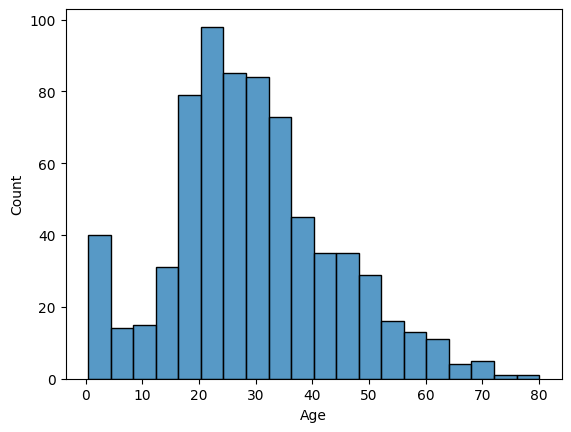

In [15]:
sns.histplot(titanic['Age'].dropna())

<Axes: xlabel='Age', ylabel='Count'>

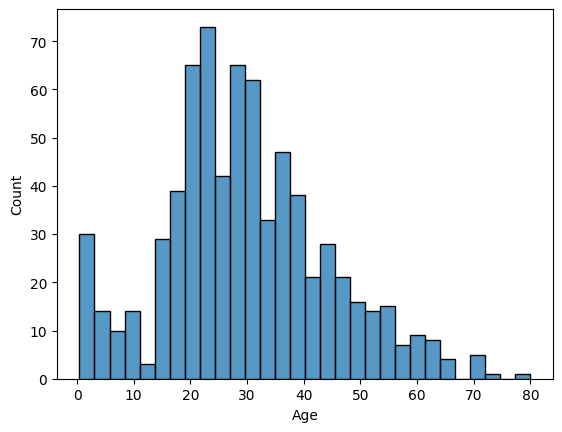

In [16]:
sns.histplot(titanic['Age'].dropna(),bins=30)

<Axes: xlabel='Fare', ylabel='Count'>

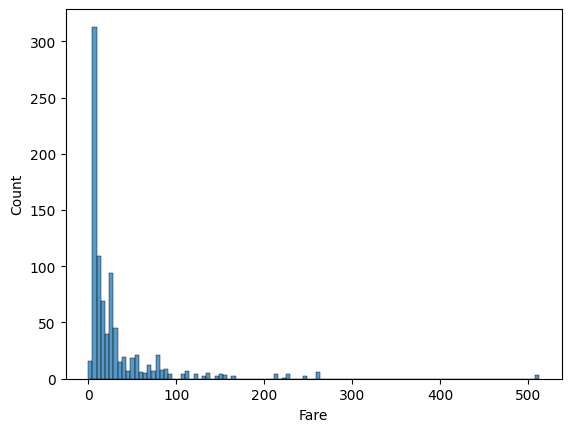

In [17]:
sns.histplot(titanic['Fare'].dropna())

In [18]:
c = titanic['Age']
z_score_age = (c-c.mean())/c.std()
z_score_age

,Age
PassengerId,
1,-0.530005
2,0.571430
3,-0.254646
4,0.364911
5,0.364911
...,...
887,-0.185807
888,-0.736524
889,NaN


In [19]:
for col in ["Age","Fare"]:
  titanic['z_score_'+col]= (titanic[col]-titanic[col].mean())/titanic[col].std()

In [20]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,z_score_Age,z_score_Fare
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-0.530005,-0.502163
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.571430,0.786404
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-0.254646,-0.488580
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.364911,0.420494
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.364911,-0.486064


In [21]:
titanic[['Age','Fare','z_score_Age','z_score_Fare']].head()

,Age,Fare,z_score_Age,z_score_Fare
PassengerId,,,,
1,22.0,7.2500,-0.530005,-0.502163
2,38.0,71.2833,0.571430,0.786404
3,26.0,7.9250,-0.254646,-0.488580
4,35.0,53.1000,0.364911,0.420494
5,35.0,8.0500,0.364911,-0.486064


In [28]:
print(titanic['Age'].std())
print(titanic['Fare'].std())
print(titanic['Age'].mean())
print(titanic['Fare'].mean())

14.526497332334044
49.693428597180905
29.69911764705882
32.204207968574636


<Axes: xlabel='z_score_Age', ylabel='Count'>

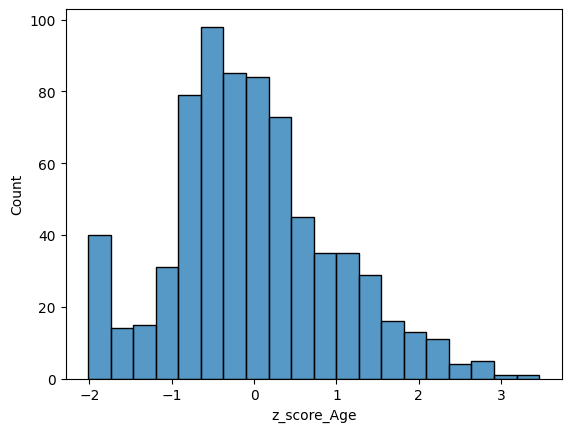

In [23]:
sns.histplot(titanic['z_score_Age'].dropna())

<Axes: xlabel='z_score_Fare', ylabel='Count'>

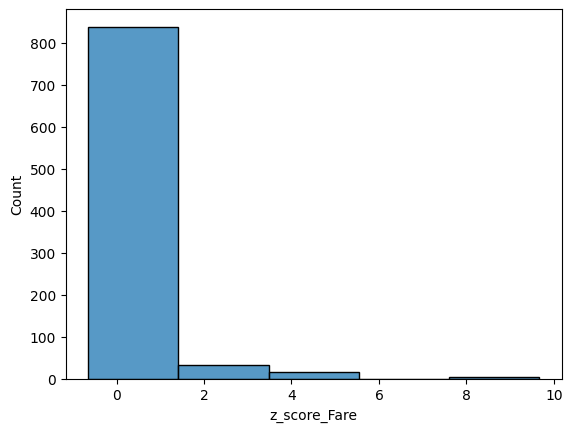

In [24]:
sns.histplot(titanic['z_score_Fare'].dropna(),bins=5)

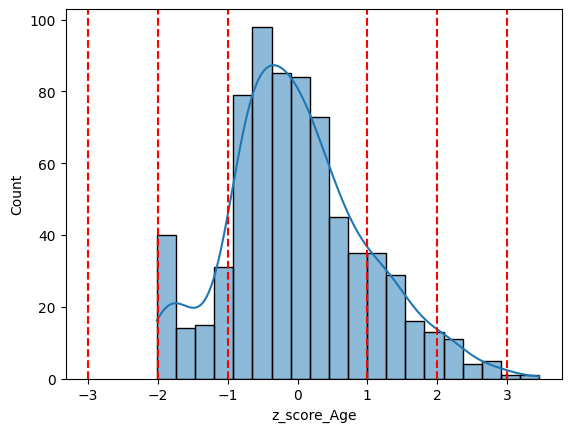

In [25]:
from matplotlib import pyplot as plt
sns.histplot(titanic['z_score_Age'].dropna(),kde=True)
for k in [1,2,3]:
  plt.axvline(-k, linestyle = '--',color = 'r')
  plt.axvline(k, linestyle = '--',color = 'r')

In [26]:
from scipy.stats import norm

In [29]:
norm.cdf(22,titanic['Age'].mean(),titanic['Age'].std())

np.float64(0.2980541979697554)

In [30]:
norm.cdf(-3.1666666666666683)

np.float64(0.0007709847844699705)

In [31]:
norm.ppf(0.0007709847844699705)

np.float64(-3.1666666666666687)